In [15]:
# folder path
import os
dir_path = "C://Users//vnarv//PycharmProjects//classification_SDA/data/"
os.chdir("C://Users//vnarv//PycharmProjects//classification_SDA/")
import plotly.io as pio
pio.renderers.default='notebook'
include_plotlyjs=True

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from conf.config import data_inputs_paths as data_inputs
from notebooks.tools_analysis import (categorical_analysis, check_nan,
                                      compute_cramer_v, numeric_corr_analysis)
from src.models.utils import feature_selection_kbest
from src.preprocessing.preprocessing_x import PreprocessData
from src.preprocessing.transform_data import TransformData
from src.tools.tools import (check_duplicates, read_excel, standard_name_cols,
                             upper_consistent)

In [18]:
# Instantiate the neccessary classes
prepro = PreprocessData(data_inputs)
td = TransformData()

# Read data

In [19]:
# folder path
dir_path = "C://Users//vnarv//PycharmProjects//classification_SDA/data/"

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        res.append(path)
print(res)

['2020_US_County_Level_Presidential_Results.csv', 'Education.xls', 'Electoral_College.csv', 'PopulationEstimates.xls', 'PovertyEstimates.xls', 'prepro_x.csv', 'prepro_y.csv', 'Unemployment.xls', 'US_County_Level_Presidential_Results_08-16.csv']


# Explore files 

In [20]:
for file in res:
    if file.endswith(".csv"):
        t = pd.read_csv(dir_path + file)
        print(f"\n========== File name {file}\n")
        display(t.head())
        print(t.columns)
        check_nan(t)

    elif file.endswith(".xls"):
        # read file
        with open(dir_path + file, mode="rb") as excel_file:
            _excel_file = pd.read_excel(excel_file,)
        print(f"\n========== File name {file}\n")
        print(_excel_file.columns[0])
        _excel_file.set_index(_excel_file.columns[0], inplace=True)
        # drop nan
        _excel_file = _excel_file.dropna(how="all")
        # set header
        header_row = _excel_file.iloc[0]
        df = pd.DataFrame(_excel_file.values[1:], columns=header_row)
        check_nan(df)
    else:
        print("Check files in data folder")


========== File name 2020_US_County_Level_Presidential_Results.csv



state_name  county_fips     county_name  votes_gop  votes_dem  total_votes  \
0    Alabama         1001  Autauga County      19838       7503        27770   
1    Alabama         1003  Baldwin County      83544      24578       109679   
2    Alabama         1005  Barbour County       5622       4816        10518   
3    Alabama         1007     Bibb County       7525       1986         9595   
4    Alabama         1009   Blount County      24711       2640        27588   

    diff   per_gop   per_dem  per_point_diff  
0  12335  0.714368  0.270184        0.444184  
1  58966  0.761714  0.224090        0.537623  
2    806  0.534512  0.457882        0.076631  
3   5539  0.784263  0.206983        0.577280  
4  22071  0.895716  0.095694        0.800022

Index(['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem',
       'total_votes', 'diff', 'per_gop', 'per_dem', 'per_point_diff'],
      dtype='object')


There are none features with NAN values


========== File name Education.xls

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019


There are features with NAN values :
Number of features with NAN = 44
Number of values with NAN = 1417
[Feature] <--- has empty values ---> [percentage of empty values]
2003 Rural-urban Continuum Code  <--->  1.89%
2003 Urban Influence Code       <--->  1.89%
2013 Rural-urban Continuum Code  <--->  1.89%
2013 Urban Influence Code       <--->  1.89%
Less than a high school diploma, 1970  <--->  2.95%
High school diploma only, 1970  <--->  2.95%
Some college (1-3 years), 1970  <--->  2.95%
Four years of college or higher, 1970  <--->  2.95%
Percent of adults with less than a high school diploma, 1970  <--->  2.95%
Percent of adults with a high s

Year    State  Votes
0  1788  Alabama    NaN
1  1792  Alabama    NaN
2  1796  Alabama    NaN
3  1800  Alabama    NaN
4  1804  Alabama    NaN

Index(['Year', 'State', 'Votes'], dtype='object')


There are features with NAN values :
Number of features with NAN = 1
Number of values with NAN = 703
[Feature] <--- has empty values ---> [percentage of empty values]
Votes                           <--->  23.36%


========== File name PopulationEstimates.xls

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)


There are features with NAN values :
Number of features with NAN = 150
Number of values with NAN = 11862
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum Code_2003  <--->  1.77%
Rural-urban_Continuum Code_2013  <--->  1.62%
Urban_Influence_Code_2003       <--->  1.77%
Urban_Influence_Code_2013       <--->  1.62%
Economic_typology_2015          <--->  4.00%
N_POP_CHG_2010                  <--->  2.41%
N_POP_CHG_2011                  <--->  2.41%
N_POP_CHG_2012                  <--->  2.41%
N_POP_CHG_2013    

FIPS_CODE;STATE;RURAL_URBAN_CONTINUUM_CODE_2013_2.0;RURAL_URBAN_CONTINUUM_CODE_2013_3.0;RURAL_URBAN_CONTINUUM_CODE_2013_4.0;RURAL_URBAN_CONTINUUM_CODE_2013_5.0;RURAL_URBAN_CONTINUUM_CODE_2013_6.0;RURAL_URBAN_CONTINUUM_CODE_2013_7.0;RURAL_URBAN_CONTINUUM_CODE_2013_8.0;RURAL_URBAN_CONTINUUM_CODE_2013_9.0;URBAN_INFLUENCE_CODE_2013_2.0;URBAN_INFLUENCE_CODE_2013_3.0;URBAN_INFLUENCE_CODE_2013_4.0;URBAN_INFLUENCE_CODE_2013_5.0;URBAN_INFLUENCE_CODE_2013_6.0;URBAN_INFLUENCE_CODE_2013_7.0;URBAN_INFLUENCE_CODE_2013_8.0;URBAN_INFLUENCE_CODE_2013_9.0;URBAN_INFLUENCE_CODE_2013_10.0;URBAN_INFLUENCE_CODE_2013_11.0;URBAN_INFLUENCE_CODE_2013_12.0;METRO_2013_1.0;ECONOMIC_TYPOLOGY_2015_1.0;ECONOMIC_TYPOLOGY_2015_2.0;ECONOMIC_TYPOLOGY_2015_3.0;ECONOMIC_TYPOLOGY_2015_4.0;ECONOMIC_TYPOLOGY_2015_5.0;POP_ESTIMATE_2019;N_POP_CHG_2010;N_POP_CHG_2012;GQ_ESTIMATES_2011;PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970;PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1980;PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980;HIGH_SCHOOL_DIPLOMA_ONLY__1990;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1990;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000;PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2000;LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19;HIGH_SCHOOL_DIPLOMA_ONLY__2015_19;SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19;PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2015_19;PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19;MED_HH_INCOME_PERCENT_OF_STATE_TOTAL_2019;RESIDUAL_2011;RESIDUAL_2018;UNEMPLOYMENT_RATE_2000;UNEMPLOYMENT_RATE_2017;UNEMPLOYMENT_RATE_2005;RESIDUAL_2016;RESIDUAL_2017;RESIDUAL_2019;RESIDUAL_2010;RESIDUAL_2015;RESIDUAL_2013;RESIDUAL_2014;RESIDUAL_2012;CI90LB017P_2019;PCTPOV517_2019;INTERNATIONAL_MIG_2012;DOMESTIC_MIG_2010;NET_MIG_2010;DOMESTIC_MIG_2011;NET_MIG_2011;DOMESTIC_MIG_2012;NET_MIG_2014;DEATHS_2019;DOMESTIC_MIG_2015;DOMESTIC_MIG_2019;UNEMPLOYED_2019;CI90LB517_2019;R_INTERNATIONAL_MIG_2019;R_INTERNATIONAL_MIG_2014;R_INTERNATIONAL_MIG_2013;R_INTERNATIONAL_MIG_2012;R_INTERNATIONAL_MIG_2011;CIVILIAN_LABOR_FORCE_2019;MEDHHINC_2019;R_NATURAL_INC_2013;R_NATURAL_INC_2012;R_NATURAL_INC_2019;R_NATURAL_INC_2011;R_NATURAL_INC_2015;R_NATURAL_INC_2017;R_NATURAL_INC_2014;R_DOMESTIC_MIG_2015;R_NET_MIG_2014;R_DOMESTIC_MIG_2012;R_NET_MIG_2018;R_DOMESTIC_MIG_2017;R_BIRTH_2011;R_NET_MIG_2013;R_BIRTH_2017;R_NET_MIG_2016;R_BIRTH_2014;R_DEATH_2019;R_NET_MIG_2011;R_BIRTH_2018;R_DEATH_2017;R_DEATH_2011;R_BIRTH_2016;R_DEATH_2012;R_DEATH_2013;R_DEATH_2015;R_DEATH_2018;R_NET_MIG_2019;R_DEATH_2016;R_DEATH_2014;R_BIRTH_2012;R_BIRTH_2013
0  01001;AL;True;False;False;False;False;False;Fa...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

Index(['FIPS_CODE;STATE;RURAL_URBAN_CONTINUUM_CODE_2013_2.0;RURAL_URBAN_CONTINUUM_CODE_2013_3.0;RURAL_URBAN_CONTINUUM_CODE_2013_4.0;RURAL_URBAN_CONTINUUM_CODE_2013_5.0;RURAL_URBAN_CONTINUUM_CODE_2013_6.0;RURAL_URBAN_CONTINUUM_CODE_2013_7.0;RURAL_URBAN_CONTINUUM_CODE_2013_8.0;RURAL_URBAN_CONTINUUM_CODE_2013_9.0;URBAN_INFLUENCE_CODE_2013_2.0;URBAN_INFLUENCE_CODE_2013_3.0;URBAN_INFLUENCE_CODE_2013_4.0;URBAN_INFLUENCE_CODE_2013_5.0;URBAN_INFLUENCE_CODE_2013_6.0;URBAN_INFLUENCE_CODE_2013_7.0;URBAN_INFLUENCE_CODE_2013_8.0;URBAN_INFLUENCE_CODE_2013_9.0;URBAN_INFLUENCE_CODE_2013_10.0;URBAN_INFLUENCE_CODE_2013_11.0;URBAN_INFLUENCE_CODE_2013_12.0;METRO_2013_1.0;ECONOMIC_TYPOLOGY_2015_1.0;ECONOMIC_TYPOLOGY_2015_2.0;ECONOMIC_TYPOLOGY_2015_3.0;ECONOMIC_TYPOLOGY_2015_4.0;ECONOMIC_TYPOLOGY_2015_5.0;POP_ESTIMATE_2019;N_POP_CHG_2010;N_POP_CHG_2012;GQ_ESTIMATES_2011;PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970;PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970;PERCENT_OF_ADULTS_COMP

COUNTY_FIPS;STATE_NAME;TARGET
0               01001;ALABAMA;0
1               01003;ALABAMA;0
2               01005;ALABAMA;0
3               01007;ALABAMA;0
4               01009;ALABAMA;0

Index(['COUNTY_FIPS;STATE_NAME;TARGET'], dtype='object')


There are none features with NAN values


========== File name Unemployment.xls

Unemployment and median household income for the U.S., States, and counties, 2000-19


There are features with NAN values :
Number of features with NAN = 85
Number of values with NAN = 706
[Feature] <--- has empty values ---> [percentage of empty values]
Rural_urban_continuum_code_2013  <--->  1.71%
Urban_influence_code_2013       <--->  1.71%
Metro_2013                      <--->  1.62%
Civilian_labor_force_2000       <--->  0.15%
Employed_2000                   <--->  0.15%
Unemployed_2000                 <--->  0.15%
Unemployment_rate_2000          <--->  0.15%
Civilian_labor_force_2001       <--->  0.15%
Employed_2001                   <--->  0.15%
Unemployed_2001                 <--->  0.15%
Unemployment_rate_2001          <--->  0.15%
Civilian_labor_force_2002       <--->  0.15%
Employed_2002                   <--->  0.15%
Unemployed_2002    

fips_code              county  total_2008  dem_2008  gop_2008  oth_2008  \
0      26041        Delta County       19064      9974      8763       327   
1      48295     Lipscomb County        1256       155      1093         8   
2       1127       Walker County       28652      7420     20722       510   
3      48389       Reeves County        3077      1606      1445        26   
4      56017  Hot Springs County        2546       619      1834        93   

   total_2012  dem_2012  gop_2012  oth_2012  total_2016  dem_2016  gop_2016  \
0       18043      8330      9533       180       18467      6431     11112   
1        1168       119      1044         5        1322       135      1159   
2       28497      6551     21633       313       29243      4486     24208   
3        2867      1649      1185        33        3184      1659      1417   
4        2495       523      1894        78        2535       400      1939   

   oth_2016  
0       924  
1        28  
2       549  
3       108  
4       196

Index(['fips_code', 'county', 'total_2008', 'dem_2008', 'gop_2008', 'oth_2008',
       'total_2012', 'dem_2012', 'gop_2012', 'oth_2012', 'total_2016',
       'dem_2016', 'gop_2016', 'oth_2016'],
      dtype='object')


There are none features with NAN values



### Target 

In [21]:
input_y = "2020_US_County_Level_Presidential_Results.csv"
df_presidential_2020 = pd.read_csv(f"{dir_path}{input_y}",
                        converters={'county_fips': str})
df_presidential_2020.columns = standard_name_cols(df_presidential_2020.columns)
df_presidential_2020[["STATE_NAME","COUNTY_NAME"]] = upper_consistent(df_presidential_2020[["STATE_NAME","COUNTY_NAME"]])
print(df_presidential_2020.columns)
check_nan(df_presidential_2020)
# main key : COUNTY_FIPS
check_duplicates(df_presidential_2020, "COUNTY_FIPS")
county_fips_list = df_presidential_2020["COUNTY_FIPS"].unique()

Index(['STATE_NAME', 'COUNTY_FIPS', 'COUNTY_NAME', 'VOTES_GOP', 'VOTES_DEM',
       'TOTAL_VOTES', 'DIFF', 'PER_GOP', 'PER_DEM', 'PER_POINT_DIFF'],
      dtype='object')


There are none features with NAN values


There none duplicates based on keys COUNTY_FIPS



# Votes per party

In [22]:
pct_votes_party = df_presidential_2020[["VOTES_DEM", "VOTES_GOP"]].apply(np.sum) / df_presidential_2020["TOTAL_VOTES"].sum()
pct_votes_party = pct_votes_party * 100

fig = px.bar(pct_votes_party,
             x=pct_votes_party.values,
             y=pct_votes_party.keys(),
             color_discrete_sequence=px.colors.qualitative.G10,
             title="2020 U.S. elections. Percentage votes per party", 
             labels={"x": "%",
                     "index": "Party"},
             color=pct_votes_party.keys(),
             height=400,
             width=800
            )
fig

In [23]:
total_votes = df_presidential_2020[["VOTES_DEM","VOTES_GOP"]].apply(sum).reset_index()
total_votes.columns = ["party", "nb votes"]
fig = px.bar(total_votes, x="nb votes", y="party",
             title="US election 2020- Total votes",
             color_discrete_sequence=px.colors.qualitative.G10,
             color={
                   'VOTES_GOP': '#DC3912',
                    'VOTES_DEM': '#3366CC'
                    
                 },
             height=400,
             width=800
             )
fig.update_traces(showlegend=False)
fig.show()

### Votes per state

In [24]:
state_list = df_presidential_2020["STATE_NAME"].unique()
county_fips_list = df_presidential_2020["COUNTY_FIPS"].unique()
county_name_list = df_presidential_2020["COUNTY_NAME"].unique()
print(f"Nb of states : {len(state_list)}")
print(f"Nb of county fips : {len(county_fips_list)}")
print(f"Nb of countys : {len(county_name_list)}")

Nb of states : 51
Nb of county fips : 3152
Nb of countys : 1887


In [25]:
winner_state_level = df_presidential_2020.groupby(['STATE_NAME'])["VOTES_GOP", "VOTES_DEM", "TOTAL_VOTES"].sum().reset_index()
winner_state_level[["VOTES_GOP", "VOTES_DEM"]].sum()
winner_state_level["Republican"] = (winner_state_level["VOTES_GOP"] / winner_state_level["TOTAL_VOTES"])*100
winner_state_level["Democratic"] = (winner_state_level["VOTES_DEM"] / winner_state_level["TOTAL_VOTES"])*100
winner_state_level["Other"] = 100 -(winner_state_level["Republican"] + winner_state_level["Democratic"])
winner_state_level = winner_state_level.sort_values(by="Democratic", ascending=False)
display(winner_state_level.head())

C:\Users\vnarv\AppData\Local\Temp\ipykernel_7128\1184456341.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



STATE_NAME  VOTES_GOP  VOTES_DEM  TOTAL_VOTES  Republican  \
8   DISTRICT OF COLUMBIA      18586     317323       344356    5.397321   
45               VERMONT     112704     242820       367428   30.673765   
21         MASSACHUSETTS    1167202    2382202      3631402   32.141911   
20              MARYLAND     976414    1985023      3037030   32.150292   
11                HAWAII     196864     366130       574469   34.268864   

    Democratic     Other  
8    92.149694  2.452985  
45   66.086417  3.239818  
21   65.600063  2.258026  
20   65.360665  2.489044  
11   63.733639  1.997497

In [26]:
fig_winner_state_level = px.bar(winner_state_level,
                                x="STATE_NAME",
                                y=["Democratic", "Republican", "Other"],
             title="U.S. 2020 presidential elections results per state",
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={"value": "%",
                     "state_name": "State",
                     "variable": "Party"},
             #orientation="h",
            width=1000,
            height=600)
fig_winner_state_level.add_hline(y=50, line_width=3, line_dash="dash", line_color="black",
              annotation_text="50%", 
              annotation_position="bottom right")
fig_winner_state_level

In [27]:
state = df_presidential_2020.groupby('STATE_NAME')['TOTAL_VOTES'].sum().reset_index()
States = state.sort_values('TOTAL_VOTES', ascending=False).head(10)
States

STATE_NAME  TOTAL_VOTES
4       CALIFORNIA     17495906
43           TEXAS     11317911
9          FLORIDA     11067456
32        NEW YORK      8616205
38    PENNSYLVANIA      6925255
13        ILLINOIS      6038850
35            OHIO      5922202
22        MICHIGAN      5539302
33  NORTH CAROLINA      5524801
10         GEORGIA      4997716

In [28]:
fig = px.pie(States, values=States['TOTAL_VOTES'], names=States['STATE_NAME'])
fig.update_layout(title = 'Top 10 States with Most Votes')
fig.show()

In [29]:
df_presidential_2020.head()

STATE_NAME COUNTY_FIPS     COUNTY_NAME  VOTES_GOP  VOTES_DEM  TOTAL_VOTES  \
0    ALABAMA       01001  AUTAUGA COUNTY      19838       7503        27770   
1    ALABAMA       01003  BALDWIN COUNTY      83544      24578       109679   
2    ALABAMA       01005  BARBOUR COUNTY       5622       4816        10518   
3    ALABAMA       01007     BIBB COUNTY       7525       1986         9595   
4    ALABAMA       01009   BLOUNT COUNTY      24711       2640        27588   

    DIFF   PER_GOP   PER_DEM  PER_POINT_DIFF  
0  12335  0.714368  0.270184        0.444184  
1  58966  0.761714  0.224090        0.537623  
2    806  0.534512  0.457882        0.076631  
3   5539  0.784263  0.206983        0.577280  
4  22071  0.895716  0.095694        0.800022

# Votes per county

In [30]:
df_presidential_2020["WINNER_DEMOCRATS"] = np.where(
    df_presidential_2020["VOTES_GOP"] <= df_presidential_2020["VOTES_DEM"], 1, 0) # calculer par state
df_presidential_2020["WINNER_DEMOCRATS"].value_counts()

0    2595
1     557
Name: WINNER_DEMOCRATS, dtype: int64

In [31]:
# https://plotly.com/python/mapbox-county-choropleth/ US MAP

In [32]:
top_countys = df_presidential_2020.sort_values(
    by="TOTAL_VOTES",
    ascending=False
)
top_countys["Republicans"] = top_countys["PER_GOP"] * 100
top_countys["Democrats"] = top_countys["PER_DEM"] * 100
top_countys["Other"] = 100 - (top_countys["Republicans"] + top_countys["Democrats"])
top_countys = top_countys.sort_values(by="Democrats", ascending=False)
top_countys = top_countys.head(20)
top_countys

STATE_NAME COUNTY_FIPS             COUNTY_NAME  VOTES_GOP  \
330   DISTRICT OF COLUMBIA       11001    DISTRICT OF COLUMBIA      18586   
1218              MARYLAND       24033  PRINCE GEORGE'S COUNTY      37090   
2422          SOUTH DAKOTA       46102    OGLALA LAKOTA COUNTY        297   
2950              VIRGINIA       51730         PETERSBURG CITY       1584   
1226              MARYLAND       24510          BALTIMORE CITY      25374   
1868              NEW YORK       36061         NEW YORK COUNTY      85185   
2928              VIRGINIA       51540    CHARLOTTESVILLE CITY       3094   
234             CALIFORNIA       06075    SAN FRANCISCO COUNTY      56417   
1442           MISSISSIPPI       28063        JEFFERSON COUNTY        531   
428                GEORGIA       13063          CLAYTON COUNTY      15811   
1421           MISSISSIPPI       28021        CLAIBORNE COUNTY        603   
1840              NEW YORK       36005            BRONX COUNTY      67740   
1158             LOUISIANA       22071          ORLEANS PARISH      26664   
441                GEORGIA       13089           DEKALB COUNTY      58377   
2954              VIRGINIA       51760           RICHMOND CITY      16603   
217             CALIFORNIA       06041            MARIN COUNTY      24612   
1607              MISSOURI       29510          ST. LOUIS CITY      21474   
3096             WISCONSIN       55078        MENOMINEE COUNTY        278   
43                 ALABAMA       01087            MACON COUNTY       1541   
2304          PENNSYLVANIA       42101     PHILADELPHIA COUNTY     132740   

      VOTES_DEM  TOTAL_VOTES    DIFF   PER_GOP   PER_DEM  PER_POINT_DIFF  \
330      317323       344356 -298737  0.053973  0.921497       -0.867524   
1218     379208       424855 -342118  0.087300  0.892559       -0.805258   
2422       2829         3200   -2532  0.092813  0.884062       -0.791250   
2950      12389        14118  -10805  0.112197  0.877532       -0.765335   
1226     207260       237461 -181886  0.106855  0.872817       -0.765962   
1868     603040       694904 -517855  0.122585  0.867803       -0.745218   
2928      20696        24205  -17602  0.127825  0.855030       -0.727205   
234      378156       443458 -321739  0.127221  0.852744       -0.725523   
1442       3327         3911   -2796  0.135771  0.850678       -0.714907   
428       95466       112330  -79655  0.140755  0.849871       -0.709116   
1421       3772         4453   -3169  0.135414  0.847069       -0.711655   
1840     355374       425715 -287634  0.159121  0.834770       -0.675649   
1158     147854       177819 -121190  0.149950  0.831486       -0.681536   
441      308162       370746 -249785  0.157458  0.831194       -0.673736   
2954      92175       111159  -75572  0.149363  0.829218       -0.679855   
217      128288       155801 -103676  0.157971  0.823409       -0.665439   
1607     110089       133867  -88615  0.160413  0.822376       -0.661963   
3096       1303         1590   -1025  0.174843  0.819497       -0.644654   
43         7108         8723   -5567  0.176659  0.814857       -0.638198   
2304     603790       741377 -471050  0.179045  0.814417       -0.635372   

      WINNER_DEMOCRATS  Republicans  Democrats     Other  
330                  1     5.397321  92.149694  2.452985  
1218                 1     8.730037  89.255864  2.014099  
2422                 1     9.281250  88.406250  2.312500  
2950                 1    11.219720  87.753223  1.027058  
1226                 1    10.685544  87.281701  2.032755  
1868                 1    12.258528  86.780332  0.961140  
2928                 1    12.782483  85.502995  1.714522  
234                  1    12.722062  85.274366  2.003572  
1442                 1    13.577090  85.067758  1.355152  
428                  1    14.075492  84.987092  0.937417  
1421                 1    13.541433  84.706939  1.751628  
1840                 1    15.912054  83.476974  0.610972  
1158                 1    14.99502

In [33]:
fig_top_countys = px.bar(top_countys, x=["Democrats", "Republicans", "Other"],
                         y="COUNTY_NAME",
                         title="Top 20 of counties with the highest volume of votes. US 2020 elections", #change title
                         color_discrete_sequence=px.colors.qualitative.G10,
                         labels={"value": "%",
                                "COUNTY_NAME": "County",
                                 "variable":"Party"
                                }
                                 )
fig_top_countys.add_vline(x=50,
                          line_width=3,
                          line_dash="dash",
                          line_color="black",
                          annotation_text="50 %",
                          annotation_position="bottom right")
fig_top_countys

In [34]:
county = df_presidential_2020.groupby('COUNTY_NAME')['TOTAL_VOTES'].sum().reset_index()
County = county.sort_values('TOTAL_VOTES',ascending=False).head(10)
County

COUNTY_NAME  TOTAL_VOTES
1025  LOS ANGELES COUNTY      4263443
1266       ORANGE COUNTY      2508914
392          COOK COUNTY      2332240
1065     MARICOPA COUNTY      2069475
1161   MONTGOMERY COUNTY      1919768
870     JEFFERSON COUNTY      1661609
767        HARRIS COUNTY      1660809
1492    SAN DIEGO COUNTY      1601722
342         CLARK COUNTY      1426384
1788   WASHINGTON COUNTY      1391479

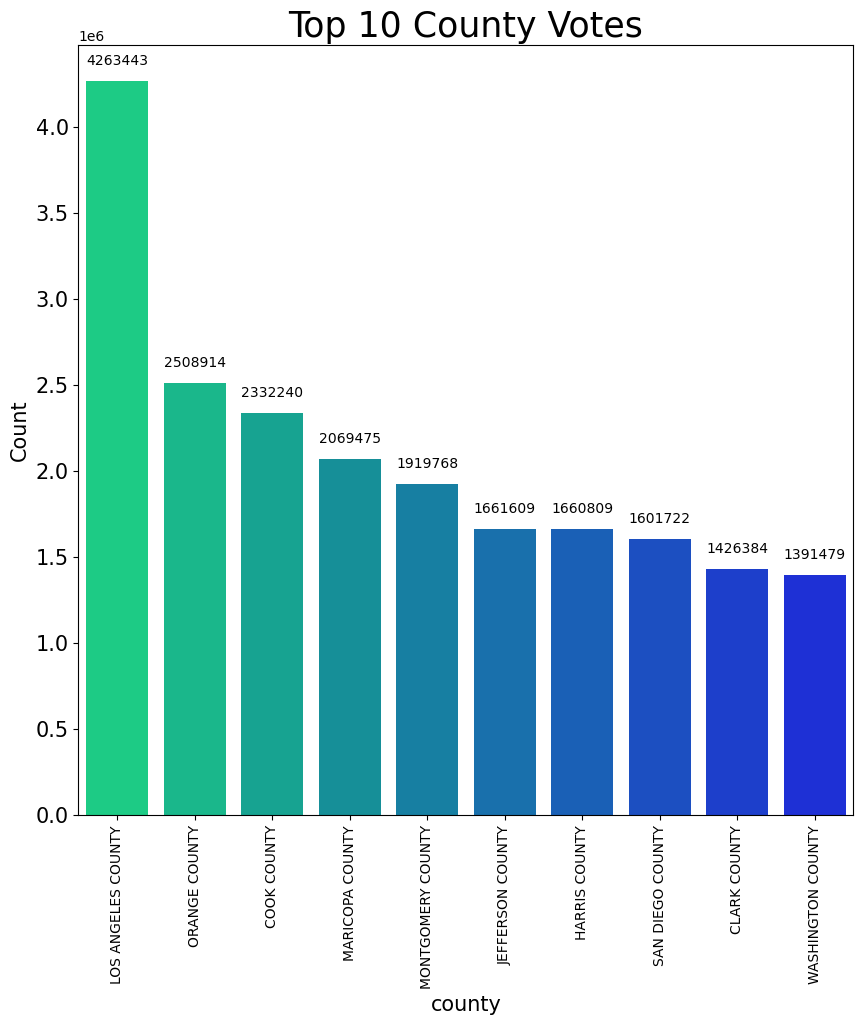

In [35]:
plt.subplots(figsize=(10,10))
splot = sns.barplot(x=County['COUNTY_NAME'],y=County['TOTAL_VOTES'], palette = 'winter_r')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points')

plt.xlabel('county',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)
plt.yticks(fontsize=15)
plt.title('Top 10 County Votes',fontsize=25);



In [36]:
top_10_democrats = df_presidential_2020.sort_values("PER_DEM", ascending=False).iloc[:10, :]
fig_democrats = px.bar(top_10_democrats, x="COUNTY_NAME", y="PER_DEM",
             title="Top 10 counties with most percentage votes for the democrats", #change title
             labels={"Democrats": "%",
                    "county_name": "County"
                    }
             )
fig_democrats.update_traces(marker_color='#1434A4')
fig_democrats.add_hline(y=0.5, line_width=3, line_dash="dash", line_color="black",
              annotation_text="50%", 
              annotation_position="bottom right")
fig_democrats

In [37]:
bottom_10_democrats = df_presidential_2020.sort_values("PER_DEM", ascending=True).iloc[:10, :]
bottom_10_democrats

STATE_NAME COUNTY_FIPS       COUNTY_NAME  VOTES_GOP  VOTES_DEM  \
2729         TEXAS       48393    ROBERTS COUNTY        529         17   
2549         TEXAS       48033     BORDEN COUNTY        397         16   
1701      NEBRASKA       31075      GRANT COUNTY        375         20   
2667         TEXAS       48269       KING COUNTY        151          8   
1624       MONTANA       30033   GARFIELD COUNTY        764         41   
997         KANSAS       20199    WALLACE COUNTY        762         44   
1722      NEBRASKA       31117  MCPHERSON COUNTY        275         17   
2619         TEXAS       48173  GLASSCOCK COUNTY        611         39   
2402  SOUTH DAKOTA       46063    HARDING COUNTY        748         49   
2683         TEXAS       48301     LOVING COUNTY         60          4   

      TOTAL_VOTES  DIFF   PER_GOP   PER_DEM  PER_POINT_DIFF  WINNER_DEMOCRATS  
2729          550   512  0.961818  0.030909        0.930909                 0  
2549          416   381  0.954327  0.038462        0.915865                 0  
1701          402   355  0.932836  0.049751        0.883085                 0  
2667          159   143  0.949686  0.050314        0.899371                 0  
1624          813   723  0.939729  0.050431        0.889299                 0  
997           817   718  0.932681  0.053856        0.878825                 0  
1722          302   258  0.910596  0.056291        0.854305                 0  
2619          653   572  0.935681  0.059724        0.875957                 0  
2402          813   699  0.920049  0.060271        0.859779                 0  
2683           66    56  0.909091  0.060606        0.848485                 0

In [38]:
fig = px.bar(bottom_10_democrats, x="COUNTY_NAME", y="PER_DEM",
             title="Bottom 10 counties, percentage votes for democrats", #change title
             labels={"Democrats": "%",
                    "county_name": "County"
                    }
            )
fig.update_traces(marker_color='#1434A4')
fig

# Electoral college votes per state for 2020

In [39]:
electoral_college = pd.read_csv(dir_path + "Electoral_College.csv", sep=',')
electoral_college.columns = standard_name_cols(electoral_college.columns)
electoral_college = electoral_college[electoral_college["YEAR"]==2020]
electoral_college[["STATE"]] = upper_consistent(electoral_college[["STATE"]])
electoral_college = electoral_college[["STATE", "VOTES"]].reset_index(drop=True)
electoral_college.loc[electoral_college["STATE"]=='D.C.', "STATE"] = "DISTRICT OF COLUMBIA"
electoral_college = electoral_college.sort_values("VOTES", ascending=False)
display(electoral_college.head())

fig_electors = px.bar(
    electoral_college, x="VOTES", y="STATE",
    title="US election 2020- Number of electoral college votes",
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    labels={"VOTES": "Nb of electoral votes"}, 
    width=800,
    height=1000
    )
fig_electors.update_traces(showlegend=False)
fig_electors.show()

STATE  VOTES
4   CALIFORNIA   55.0
43       TEXAS   38.0
9      FLORIDA   29.0
32    NEW YORK   29.0
13    ILLINOIS   20.0

There are 538 electors. A succesful presidential candidate would need to get a majority of these. At least, 270 in order to win the elections.


In [40]:
df_presidential_2020_ev = pd.merge(df_presidential_2020,
                                     electoral_college,
                                 left_on="STATE_NAME", right_on="STATE", how="left")

In [41]:
df_presidential_2020_ev[df_presidential_2020_ev["VOTES"].isna()] # if null ok 

Empty DataFrame
Columns: [STATE_NAME, COUNTY_FIPS, COUNTY_NAME, VOTES_GOP, VOTES_DEM, TOTAL_VOTES, DIFF, PER_GOP, PER_DEM, PER_POINT_DIFF, WINNER_DEMOCRATS, STATE, VOTES]
Index: []

The democratic party won the majority vote with more than 81 million votes

In [42]:
df_state_winner = df_presidential_2020_ev.groupby(["STATE_NAME", "VOTES"
    ])["VOTES_GOP", "VOTES_DEM", "TOTAL_VOTES"].agg(lambda x:x.sum())
df_state_winner = df_state_winner.reset_index()
df_state_winner["STATE_WINNER"] = np.where(
    df_state_winner["VOTES_GOP"]<df_state_winner["VOTES_DEM"],
    "Democrats",
    "Republicans"
    )
df_state_winner["STATE_WINNER_DUMMY"] = np.where(
    df_state_winner["VOTES_GOP"]<df_state_winner["VOTES_DEM"],
    1,
    0
    )
ec_democrats= df_state_winner["STATE_WINNER_DUMMY"]*df_state_winner["VOTES"]#electors democrats
ec_republicans = (1-df_state_winner["STATE_WINNER_DUMMY"])*df_state_winner["VOTES"]

r=""
r += "\nElectoral college votes:\n"
r += f"\ndemocrats : {ec_democrats.sum()}"
r += f"\nrepublicans : {ec_republicans.sum()}"

print(r)


Electoral college votes:

democrats : 306.0
republicans : 232.0


C:\Users\vnarv\AppData\Local\Temp\ipykernel_7128\2070977198.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [43]:
fig_ec_2022 = px.bar(df_state_winner,
                     x="STATE_NAME",
                     y="VOTES",
                     color="STATE_WINNER",
                     color_discrete_sequence=["red", "blue"],
                     title="US election 2020- Electoral college results",
                     labels={"VOTES": "Nb of electoral votes"}
            )
fig_ec_2022.update(layout_coloraxis_showscale=False)
#fig_ec_2022.update_traces(showlegend=True)
fig_ec_2022.show()

## A party can win in most of the counties, but lose at the state level

In [44]:
df_new_mexico = df_presidential_2020_ev[df_presidential_2020_ev["STATE_NAME"]=="NEW MEXICO"]
df_new_mexico = df_new_mexico.sort_values("PER_DEM", ascending=False)
df_new_mexico["OTHER"] = 1 - (df_new_mexico["PER_DEM"] + df_new_mexico["PER_GOP"])
fig_new_mexico = px.bar(df_new_mexico, x="COUNTY_NAME",
                        y=["PER_DEM", "PER_GOP", "OTHER"],
                        title="US election 2020- Percentage votes in New Mexico",
                        color_discrete_sequence=px.colors.qualitative.G10,
                        labels={"value": "%"}
                     )
fig_new_mexico.add_hline(y=0.5, line_width=3,
                         line_dash="dash",
                         line_color="black",
                         annotation_text="50%",
                         annotation_position="bottom right")
fig_new_mexico.show()

In [45]:
total_votes_new_mexico = df_new_mexico[["VOTES_DEM", "VOTES_GOP", "TOTAL_VOTES"]].sum().reset_index()
total_votes_new_mexico.columns = ['variable', 'Nb of votes']
fig_new_mexico_tt = px.bar(
    total_votes_new_mexico,
    x="variable",
    y="Nb of votes",
    color="variable",
    title="US election 2020- Number of votes in the state of New Mexico",
    color_discrete_sequence=["blue", "red", "grey"],
    )
fig_new_mexico_tt.update_traces(showlegend=False)
fig_new_mexico_tt.show()

In New Mexico, republicans won in most counties, but the majority vote at the state level went to the democrats

# Explanatory variables analysis

### Population Estimates data


In [46]:
df_population = read_excel(f"{dir_path}PopulationEstimates.xls")
df_population.head()


========== File name <_io.BufferedReader name='C://Users//vnarv//PycharmProjects//classification_SDA/data/PopulationEstimates.xls'>

Population estimates for the U.S., States, and counties, 2010-19 (see the second tab in this workbook for variable name descriptions)


0 FIPStxt State       Area_Name Rural-urban_Continuum Code_2003  \
0   00000    US   United States                             NaN   
1   01000    AL         Alabama                             NaN   
2   01001    AL  Autauga County                               2   
3   01003    AL  Baldwin County                               4   
4   01005    AL  Barbour County                               6   

0 Rural-urban_Continuum Code_2013 Urban_Influence_Code_2003  \
0                             NaN                       NaN   
1                             NaN                       NaN   
2                               2                         2   
3                               3                         5   
4                               6                         6   

0 Urban_Influence_Code_2013 Economic_typology_2015 CENSUS_2010_POP  \
0                       NaN                    NaN       308745538   
1                       NaN                    NaN         4779736   
2                         2                      0           54571   
3                         2                      5          182265   
4                         6                      3           27457   

0 ESTIMATES_BASE_2010  ... R_DOMESTIC_MIG_2019 R_NET_MIG_2011 R_NET_MIG_2012  \
0           308758105  ...                 NaN            NaN            NaN   
1             4780125  ...            1.917501       0.578434       1.186314   
2               54597  ...             4.84731       6.018182      -6.226119   
3              182265  ...           24.017829       16.64187      17.488579   
4               27455  ...           -5.690302       0.292676      -6.897817   

0 R_NET_MIG_2013 R_NET_MIG_2014 R_NET_MIG_2015 R_NET_MIG_2016 R_NET_MIG_2017  \
0            NaN            NaN            NaN            NaN            NaN   
1       1.522549       0.563489       0.626357       0.745172       1.090366   
2      -3.902226       1.970443      -1.712875       4.777171       0.849656   
3      22.751474      20.184334      17.725964      21.279291      22.398256   
4      -8.132185      -5.140431     -15.724575     -18.238016     -24.998528   

0 R_NET_MIG_2018 R_NET_MIG_2019  
0            NaN            NaN  
1       1.773786       2.483744  
2       0.540916       4.560062  
3      24.727215      24.380567  
4      -8.754922      -5.165664  

[5 rows x 165 columns]

In [47]:
### explore data
print(df_population.columns)
print(df_population.shape)
check_nan(df_population) # there are nan values
check_duplicates(df_population, ['FIPStxt', 'State'])

Index(['FIPStxt', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2011', 'R_NET_MIG_2012',
       'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015', 'R_NET_MIG_2016',
       'R_NET_MIG_2017', 'R_NET_MIG_2018', 'R_NET_MIG_2019'],
      dtype='object', name=0, length=165)
(3273, 165)


There are features with NAN values :
Number of features with NAN = 150
Number of values with NAN = 11862
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum Code_2003  <--->  1.77%
Rural-urban_Continuum Code_2013  <--->  1.62%
Urban_Influence_Code_2003       <--->  1.77%
Urban_Influence_Code_2013       <--->  1.62%
Economic_typology_2015          <--->  4.00%
N_POP_CHG_2010                  <--->  2.41%
N_POP_CHG_2011            

In [48]:
# all variables are coded as "object"
df_population.dtypes

0
FIPStxt                            object
State                              object
Area_Name                          object
Rural-urban_Continuum Code_2003    object
Rural-urban_Continuum Code_2013    object
                                    ...  
R_NET_MIG_2015                     object
R_NET_MIG_2016                     object
R_NET_MIG_2017                     object
R_NET_MIG_2018                     object
R_NET_MIG_2019                     object
Length: 165, dtype: object

### Clean database

In [49]:
FIPS_name = df_population.filter(regex="FIPS|fips").columns[0]
df_population = df_population.rename(columns={FIPS_name: "FIPS_CODE"})
# standardize column names (all upper case)
df_population.columns = standard_name_cols(df_population.columns)
data_to_upper_case = ["STATE", "AREA_NAME"]
df_population[data_to_upper_case] = upper_consistent(df_population[data_to_upper_case])


prepro = PreprocessData(data_inputs)
# correct data types
object_columns = ["STATE", "AREA_NAME", "FIPS_CODE"]
numeric_columns = [col for col in df_population.columns if col not in object_columns]
df_population[numeric_columns] = df_population[numeric_columns].astype("Float64")

# keep only counties
df_population_county = td._split_state_county(df_population, county_fips_list)
df_population_county = prepro._split_categ_conti(df_population_county, 10)


Nb of counties found: 3112 / 3152
Missing county(ies): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']


 Features with < 300 unique values
ECONOMIC_TYPOLOGY_2015      6
RESIDUAL_2011              92
RESIDUAL_2018             101
RESIDUAL_2016             112
RESIDUAL_2017             116
RESIDUAL_2019             118
RESIDUAL_2010             186
RESIDUAL_2015             188
RESIDUAL_2013             220
RESIDUAL_2014             250
RESIDUAL_2012             258
dtype: int64
The threshold of distinct values to consider as categ is 10


- Missing counties correspond to the state of Alaska

In [50]:
df_population_county.dtypes # data types corrected

FIPS_CODE                          category
STATE                              category
AREA_NAME                          category
RURAL_URBAN_CONTINUUM_CODE_2003    category
RURAL_URBAN_CONTINUUM_CODE_2013    category
                                     ...   
R_NET_MIG_2019                      Float64
R_NET_MIG_2017                      Float64
R_DEATH_2016                        Float64
R_BIRTH_2012                        Float64
R_BIRTH_2013                        Float64
Length: 165, dtype: object

In [51]:
# handle nan if any
df_x_no_nan = prepro.check_nan(df_population_county, True, group_cols=["STATE"])

# update numeric columns
numeric_columns = df_x_no_nan.select_dtypes(np.number).columns.tolist()
category_columns = df_x_no_nan.select_dtypes(exclude=np.number).columns.tolist()

## filter too correlated features/ features with variance nearly 0
# keep recent data
recent_feats = ['POP_ESTIMATE_2019', 'N_POP_CHG_2019', 
               'GQ_ESTIMATES_2019', 'INTERNATIONAL_MIG_2019',
               'NATURAL_INC_2019',  'DEATHS_2019',
               'DOMESTIC_MIG_2019', 'BIRTHS_2019',
               'R_DOMESTIC_MIG_2019', 'R_BIRTH_2019']

df_x_numeric_preprocessed = prepro.select_features(
    df_x_no_nan.select_dtypes(np.number),
    abs_corr_thresh=0.80,
    feat_to_keep=recent_feats,
    max_var_toDrop=0.01
)
df_population_prepro = pd.concat(
    [df_x_no_nan[category_columns],
     df_x_numeric_preprocessed],
    axis=1
)



There are none features with NAN values

... Selecting features by variance and correlation
Columns with std less than 0.01: []

 There are correlated features based on threshold :
Number of features to keep = 15
Number of features to drop = 141
[Feature TO KEEP] <--- is correlated with ---> [Feature(s) TO DROP]
N_POP_CHG_2019                  <--->  {'INTERNATIONAL_MIG_2013', 'NET_MIG_2011', 'INTERNATIONAL_MIG_2014', 'NATURAL_INC_2019', 'POP_ESTIMATE_2017', 'BIRTHS_2013', 'POP_ESTIMATE_2014', 'GQ_ESTIMATES_2010', 'NATURAL_INC_2015', 'BIRTHS_2012', 'DOMESTIC_MIG_2016', 'BIRTHS_2016', 'INTERNATIONAL_MIG_2011', 'N_POP_CHG_2011', 'BIRTHS_2015', 'POP_ESTIMATE_2013', 'GQ_ESTIMATES_2019', 'DOMESTIC_MIG_2018', 'N_POP_CHG_2014', 'N_POP_CHG_2015', 'NATURAL_INC_2013', 'NATURAL_INC_2010', 'INTERNATIONAL_MIG_2010', 'GQ_ESTIMATES_2014', 'GQ_ESTIMATES_BASE_2010', 'BIRTHS_2018', 'NATURAL_INC_2012', 'NET_MIG_2018', 'DOMESTIC_MIG_2015', 'POP_ESTIMATE_2016', 'INTERNATIONAL_MIG_2015', 'DEATHS_2014', 'D

In [52]:
print(f"Initial shape: {df_population.shape}")
print(f"Shape after preprocessing: {df_population_prepro.shape}")

Initial shape: (3273, 165)
Shape after preprocessing: (3112, 36)


- Missing counties correspond to the state of Alaska: Unlike other states within the United States, Alaska does not administer its presidential elections at the county-level but rather at the lower chamber legislative district, or the House District
- Death rate variables are highly correlated between them (< 95%)

In [53]:
df_population_prepro.head()

FIPS_CODE STATE       AREA_NAME RURAL_URBAN_CONTINUUM_CODE_2003  \
2     01001    AL  AUTAUGA COUNTY                             2.0   
3     01003    AL  BALDWIN COUNTY                             4.0   
4     01005    AL  BARBOUR COUNTY                             6.0   
5     01007    AL     BIBB COUNTY                             1.0   
6     01009    AL   BLOUNT COUNTY                             1.0   

  RURAL_URBAN_CONTINUUM_CODE_2013 URBAN_INFLUENCE_CODE_2003  \
2                             2.0                       2.0   
3                             3.0                       5.0   
4                             6.0                       6.0   
5                             1.0                       1.0   
6                             1.0                       1.0   

  URBAN_INFLUENCE_CODE_2013 ECONOMIC_TYPOLOGY_2015  POP_ESTIMATE_2019  \
2                       2.0                    0.0            55869.0   
3                       2.0                    5.0           223234.0   
4                       6.0                    3.0            24686.0   
5                       1.0                    0.0            22394.0   
6                       1.0                    0.0            57826.0   

   N_POP_CHG_2019  ...  R_DOMESTIC_MIG_2015  R_NET_MIG_2014  \
2           336.0  ...            -1.949762        1.970443   
3          5379.0  ...             17.07442       20.184334   
4          -186.0  ...           -16.214789       -5.140431   
5            27.0  ...             0.753563        1.331144   
6            55.0  ...             -1.56451        -2.04959   

   R_DOMESTIC_MIG_2011  R_NET_MIG_2018  R_DOMESTIC_MIG_2017  R_NET_MIG_2012  \
2             5.945455        0.540916              1.06659       -6.226119   
3            15.684259       24.727215            21.988851       17.488579   
4             0.475598       -8.754922           -25.469458       -6.897817   
5            -5.436808       -6.857092            -3.677774       -3.787545   
6             0.487228       -0.069229             6.210911       -1.650165   

   R_DOMESTIC_MIG_2013  R_DOMESTIC_MIG_2016  R_DOMESTIC_MIG_2019  R_BIRTH_2019  
2            -4.121042             4.831664              4.84731     11.202671  
3            21.691816            20.402397            24.017829     10.446871  
4             -7.76254           -18.890745            -5.690302     10.331329  
5             -6.68319            -1.328845             1.385134     10.723621  
6            -1.128482            -1.773605             1.020788     11.263268  

[5 rows x 36 columns]

# Join X and Y

In [54]:
cat_cols = ['ECONOMIC_TYPOLOGY_2015']
eco_types = { 
    0: 'Nonspecialized',
    1: 'Farm dependent',
    2: 'Mining dependent',
    3: 'Manufacturing dependent',
    4: 'Federal/Stae government dependent',
    5: 'Recreation'
}


rural_urban_labels = {
    1: "Large-in a metro area with at least 1 million residents or more",                                  
    2: "Small-in a metro area with fewer than 1 million residents",                             
    3: "Micropolitan adjacent to a large metro area",                                           
    4: "Noncore adjacent to a large metro area",                                                        
    5: "Micropolitan adjacent to a small metro area",                                                         
    6: "Noncore adjacent to a small metro with town of at least 2,500 residents",                             
    7: "Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents",           
    8: "Micropolitan not adjacent to a metro area",                                                           
    9: "Noncore adjacent to micro area and contains a town of 2,500-19,999 residents",                        
    10: "Noncore adjacent to micro area and does not contain a town of at least 2,500 residents",              
    11: "Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents",          
    12: "Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents" 
}

df_population_prepro[
    "ECONOMIC_TYPOLOGY_2015"] = df_population_prepro["ECONOMIC_TYPOLOGY_2015"].replace(eco_types)
df_population_prepro[
    "RURAL_URBAN_CONTINUUM_CODE_2013"] = df_population_prepro["RURAL_URBAN_CONTINUUM_CODE_2013"].replace(
    rural_urban_labels)




# Numeric variables and Y

Most correlated variables with Y (threshold +/- 0.3)
                          WINNER_DEMOCRATS
GQ_ESTIMATES_2019                 0.404665
DEATHS_2019                       0.362969
POP_ESTIMATE_2019                 0.357416
BIRTHS_2019                       0.353043
R_INTERNATIONAL_MIG_2011          0.350595
R_INTERNATIONAL_MIG_2014          0.344895
NATURAL_INC_2019                  0.301474


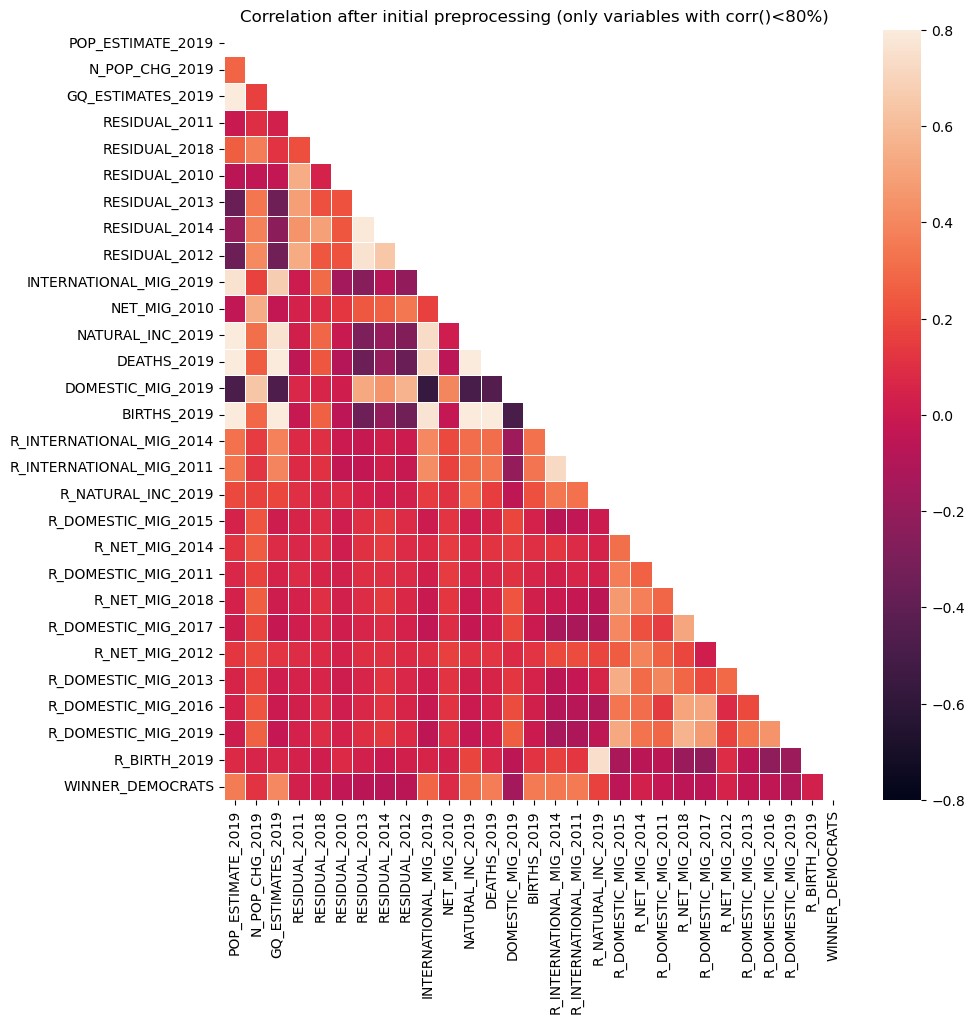

In [55]:
df_pop_prepro_y = numeric_corr_analysis(df_population_prepro,
                                        y=df_presidential_2020[["COUNTY_FIPS", "WINNER_DEMOCRATS"]],
                                        alias="population")

- GQ_ESTIMATES_2019, pop estimates, birth rat and migration rate, are positively correlated with the target.
- In contrast, domestic mig and death rate 2019 are negatively correlated 

### Categorical variables and Y

In [56]:
# V de Cramer
cramer_matrix = compute_cramer_v(df_pop_prepro_y.select_dtypes(exclude=np.number))
cramer_matrix

FIPS_CODE   STATE  AREA_NAME  \
FIPS_CODE                           1.0000  0.9900     0.9997   
STATE                               0.9900  1.0000     0.7790   
AREA_NAME                           0.9997  0.7790     1.0000   
RURAL_URBAN_CONTINUUM_CODE_2003     0.9428  0.2460     0.7299   
RURAL_URBAN_CONTINUUM_CODE_2013     0.9428  0.2331     0.7321   
URBAN_INFLUENCE_CODE_2003           0.9574  0.2190     0.7380   
URBAN_INFLUENCE_CODE_2013           0.9574  0.2206     0.7393   
ECONOMIC_TYPOLOGY_2015              0.9129  0.3244     0.7203   
COUNTY_FIPS                         0.9998  0.9900     0.9997   
WINNER_PARTY                        0.7072  0.3172     0.5855   

                                 RURAL_URBAN_CONTINUUM_CODE_2003  \
FIPS_CODE                                                 0.9428   
STATE                                                     0.2460   
AREA_NAME                                                 0.7299   
RURAL_URBAN_CONTINUUM_CODE_2003                           1.0000   
RURAL_URBAN_CONTINUUM_CODE_2013                           0.7736   
URBAN_INFLUENCE_CODE_2003                                 0.7348   
URBAN_INFLUENCE_CODE_2013                                 0.6374   
ECONOMIC_TYPOLOGY_2015                                    0.2367   
COUNTY_FIPS                                               0.9428   
WINNER_PARTY                                              0.2232   

                                 RURAL_URBAN_CONTINUUM_CODE_2013  \
FIPS_CODE                                                 0.9428   
STATE                                                     0.2331   
AREA_NAME                                                 0.7321   
RURAL_URBAN_CONTINUUM_CODE_2003                           0.7736   
RURAL_URBAN_CONTINUUM_CODE_2013                           1.0000   
URBAN_INFLUENCE_CODE_2003                                 0.6463   
URBAN_INFLUENCE_CODE_2013                                 0.7313   
ECONOMIC_TYPOLOGY_2015                                    0.2341   
COUNTY_FIPS                                               0.9428   
WINNER_PARTY                                              0.2122   

                                 URBAN_INFLUENCE_CODE_2003  \
FIPS_CODE                                           0.9574   
STATE                                               0.2190   
AREA_NAME                                           0.7380   
RURAL_URBAN_CONTINUUM_CODE_2003                     0.7348   
RURAL_URBAN_CONTINUUM_CODE_2013                     0.6463   
URBAN_INFLUENCE_CODE_2003                           1.0000   
URBAN_INFLUENCE_CODE_2013                           0.7400   
ECONOMIC_TYPOLOGY_2015                              0.2304   
COUNTY_FIPS                                         0.9574   
WINNER_PARTY                                        0.2149   

                                 URBAN_INFLUENCE_CODE_2013  \
FIPS_CODE                                           0.9574   
STATE                                               0.2206   
AREA_NAME                                           0.7393   
RURAL_URBAN_CONTINUUM_CODE_2003                     0.6374   
RURAL_URBAN_CONTINUUM_CODE_2013                     0.7313   
URBAN_INFLUENCE_CODE_2003                           0.7400   
URBAN_INFLUENCE_CODE_2013                           1.0000   
ECONOMIC_TYPOLOGY_2015                              0.2281   
COUNTY_FIPS                                         0.9574   
WINNER_PARTY                                        0.2072   

                                 ECONOMIC_TYPOLOGY_2015  COUNTY_FIPS  \
FIPS_CODE                                        0.9129       0.9998   
STATE                                            0.3244       0.9900   
AREA_NAME                                        0.7203       0.9997   
RURAL_URBAN_CONTINUUM_CODE_2003                  0.2367       0.9428   
RURAL_URBAN_CONTINUUM_CODE_2013                  0.2341       0.9428   
URBAN_INFLUENCE_CODE_

<AxesSubplot: title={'center': 'V cramer for categorical variables'}>

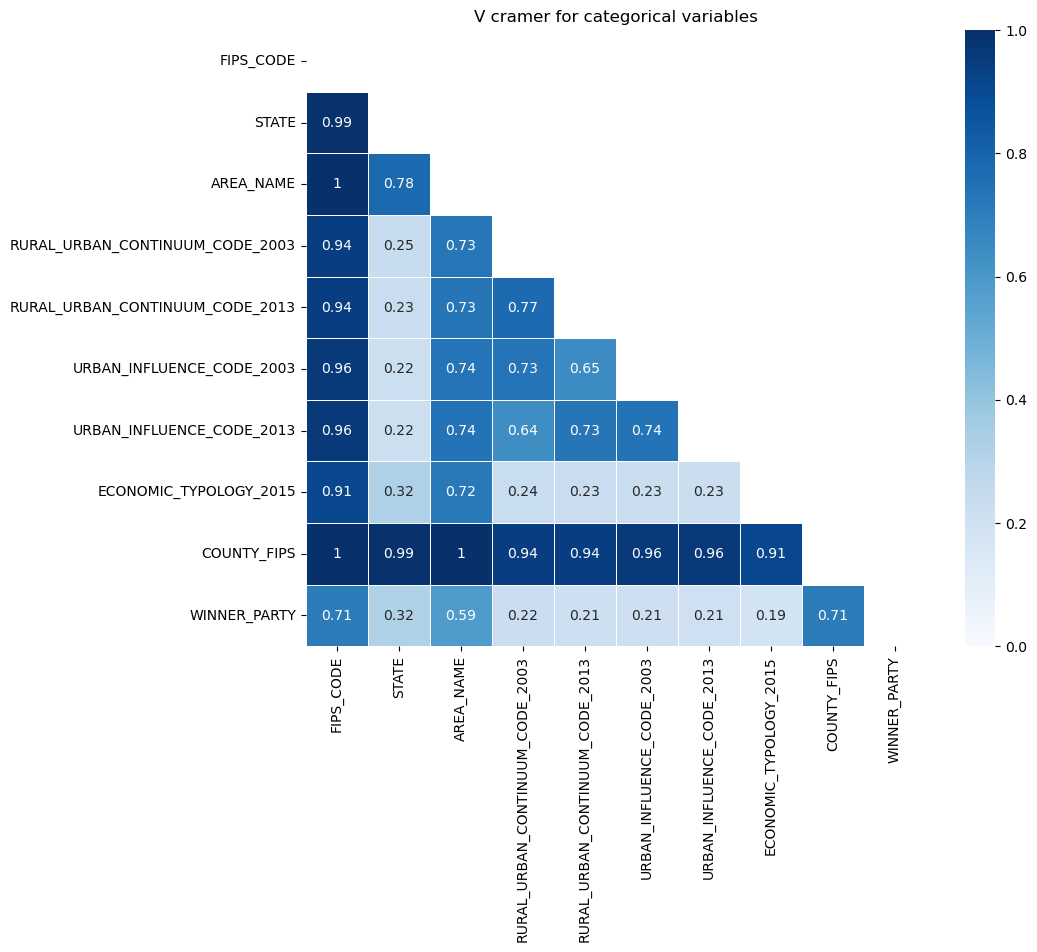

In [57]:
# Vizualisation
mask = np.triu(np.ones_like(cramer_matrix))
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('V cramer for categorical variables')
sns.heatmap(
    cramer_matrix,
    vmin=0, vmax=1,
    mask=mask,
    annot=True,
    cmap="Blues",
    linewidths=.5,
    ax=ax
)


Note: Rural-Urban Continuum Codes form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area.

- Use as index: FIPS_CODE, STATE, AREA_NAME
- The rest of categorical variables will be transform into dummies

In [58]:
X_pop = df_pop_prepro_y.drop("WINNER_DEMOCRATS", axis=1)
y_pop = df_pop_prepro_y[["WINNER_DEMOCRATS"]]
pop_Kbest= feature_selection_kbest(X_pop, y_pop["WINNER_DEMOCRATS"], 25)

C:\Users\vnarv\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



25 most important features according to <<Kbest method>>
['POP_ESTIMATE_2019', 'N_POP_CHG_2019', 'GQ_ESTIMATES_2019', 'RESIDUAL_2011', 'RESIDUAL_2018', 'RESIDUAL_2010', 'RESIDUAL_2013', 'RESIDUAL_2014', 'RESIDUAL_2012', 'INTERNATIONAL_MIG_2019', 'NET_MIG_2010', 'NATURAL_INC_2019', 'DEATHS_2019', 'DOMESTIC_MIG_2019', 'BIRTHS_2019', 'R_INTERNATIONAL_MIG_2014', 'R_INTERNATIONAL_MIG_2011', 'R_NATURAL_INC_2019', 'R_NET_MIG_2014', 'R_DOMESTIC_MIG_2011', 'R_NET_MIG_2018', 'R_DOMESTIC_MIG_2017', 'R_NET_MIG_2012', 'R_DOMESTIC_MIG_2019', 'R_BIRTH_2019']


Most of 2019 variables have the highest correlation with y

### Education data

In [59]:
df_education = read_excel(f"{dir_path}Education.xls")
df_education["Area name"] = df_education["Area name"].replace("Lousiana", "LOUISIANA" )
### explore data
check_nan(df_education)
check_duplicates(df_education, ['FIPS Code', 'State', 'Area name'])



========== File name <_io.BufferedReader name='C://Users//vnarv//PycharmProjects//classification_SDA/data/Education.xls'>

Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019


There are features with NAN values :
Number of features with NAN = 44
Number of values with NAN = 1417
[Feature] <--- has empty values ---> [percentage of empty values]
2003 Rural-urban Continuum Code  <--->  1.89%
2003 Urban Influence Code       <--->  1.89%
2013 Rural-urban Continuum Code  <--->  1.89%
2013 Urban Influence Code       <--->  1.89%
Less than a high school diploma, 1970  <--->  2.95%
High school diploma only, 1970  <--->  2.95%
Some college (1-3 years), 1970  <--->  2.95%
Four years of college or higher, 1970  <--->  2.95%
Percent of adults with less than a high school diploma, 1970  <--->  2.95%
Percent of adults with a high school diploma only, 1970  <--->  2.95%
Percent of adults completing some college (1-3 years), 1970  <--->  2.95%
Percent of ad

In [60]:
FIPS_name = df_education.filter(regex="FIPS|fips").columns[0]
df_education = df_education.rename(columns={FIPS_name: "FIPS_CODE"})

df_education.columns = standard_name_cols(df_education.columns)
data_to_upper_case = ["STATE", "AREA_NAME"]
df_education[data_to_upper_case] = upper_consistent(df_education[data_to_upper_case])

df_education_county = td._split_state_county(df_education.copy(deep=True), county_fips_list)

df_education_county = df_education_county.set_index(["STATE", "FIPS_CODE", "AREA_NAME"])
cols_to_drop = ["2003_RURAL_URBAN_CONTINUUM_CODE",
                "2003_URBAN_INFLUENCE_CODE",
                "2013_RURAL_URBAN_CONTINUUM_CODE",
                "2013_URBAN_INFLUENCE_CODE"]

df_education_county = df_education_county.drop(cols_to_drop, axis=1)


Nb of counties found: 3112 / 3152
Missing county(ies): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']



**Note**: From now on I apply the preprocessing using a class

In [61]:
prepro = PreprocessData(data_inputs)
recent_info_education = [
    'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19',
    'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19',
    'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19',
    "PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___2015_19",
    "PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2015_19",
    "PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__2015_19",
    "PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19"
    
]

df_education_prepro = prepro.run_preprocessing(
    df_x=df_education_county,
    abs_corr_thresh=0.80,
    feat_to_keep=recent_info_education,
    type_dummies=np.number
    )

Save mode: False


There are features with NAN values :
Number of features with NAN = 32
Number of values with NAN = 88
[Feature] <--- has empty values ---> [percentage of empty values]
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  <--->  0.19%
HIGH_SCHOOL_DIPLOMA_ONLY__1970  <--->  0.19%
SOME_COLLEGE__1_3_YEARS___1970  <--->  0.19%
FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970  <--->  0.19%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970  <--->  0.19%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__1970  <--->  0.19%
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE__1_3_YEARS___1970  <--->  0.19%
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970  <--->  0.19%
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980  <--->  0.10%
HIGH_SCHOOL_DIPLOMA_ONLY__1980  <--->  0.10%
SOME_COLLEGE__1_3_YEARS___1980  <--->  0.10%
FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1980  <--->  0.10%
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1980  <--->  0.10%
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__

- Variables in education df are correlated (corr()>80%), specially `HIGH_SCHOOL_DIPLOMA_ONLY__2000` with all other variables

In [62]:
print(f"Initial shape: {df_education.shape}")
print(f"Initial shape: {df_education_prepro.shape}")

Initial shape: (3283, 47)
Initial shape: (3112, 9)


In [63]:
df_education_prepro.dtypes

PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970                Float64
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970          Float64
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000                     Float64
LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19                                    Float64
HIGH_SCHOOL_DIPLOMA_ONLY__2015_19                                           Float64
SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19                                 Float64
PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19             Float64
PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19    Float64
PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2015_19               Float64
dtype: object

Most correlated variables with Y (threshold +/- 0.3)
                                                    WINNER_DEMOCRATS
PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_H...          0.453266
PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLL...          0.453007
SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19                 0.352183
HIGH_SCHOOL_DIPLOMA_ONLY__2015_19                           0.347158
PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ON...         -0.472105


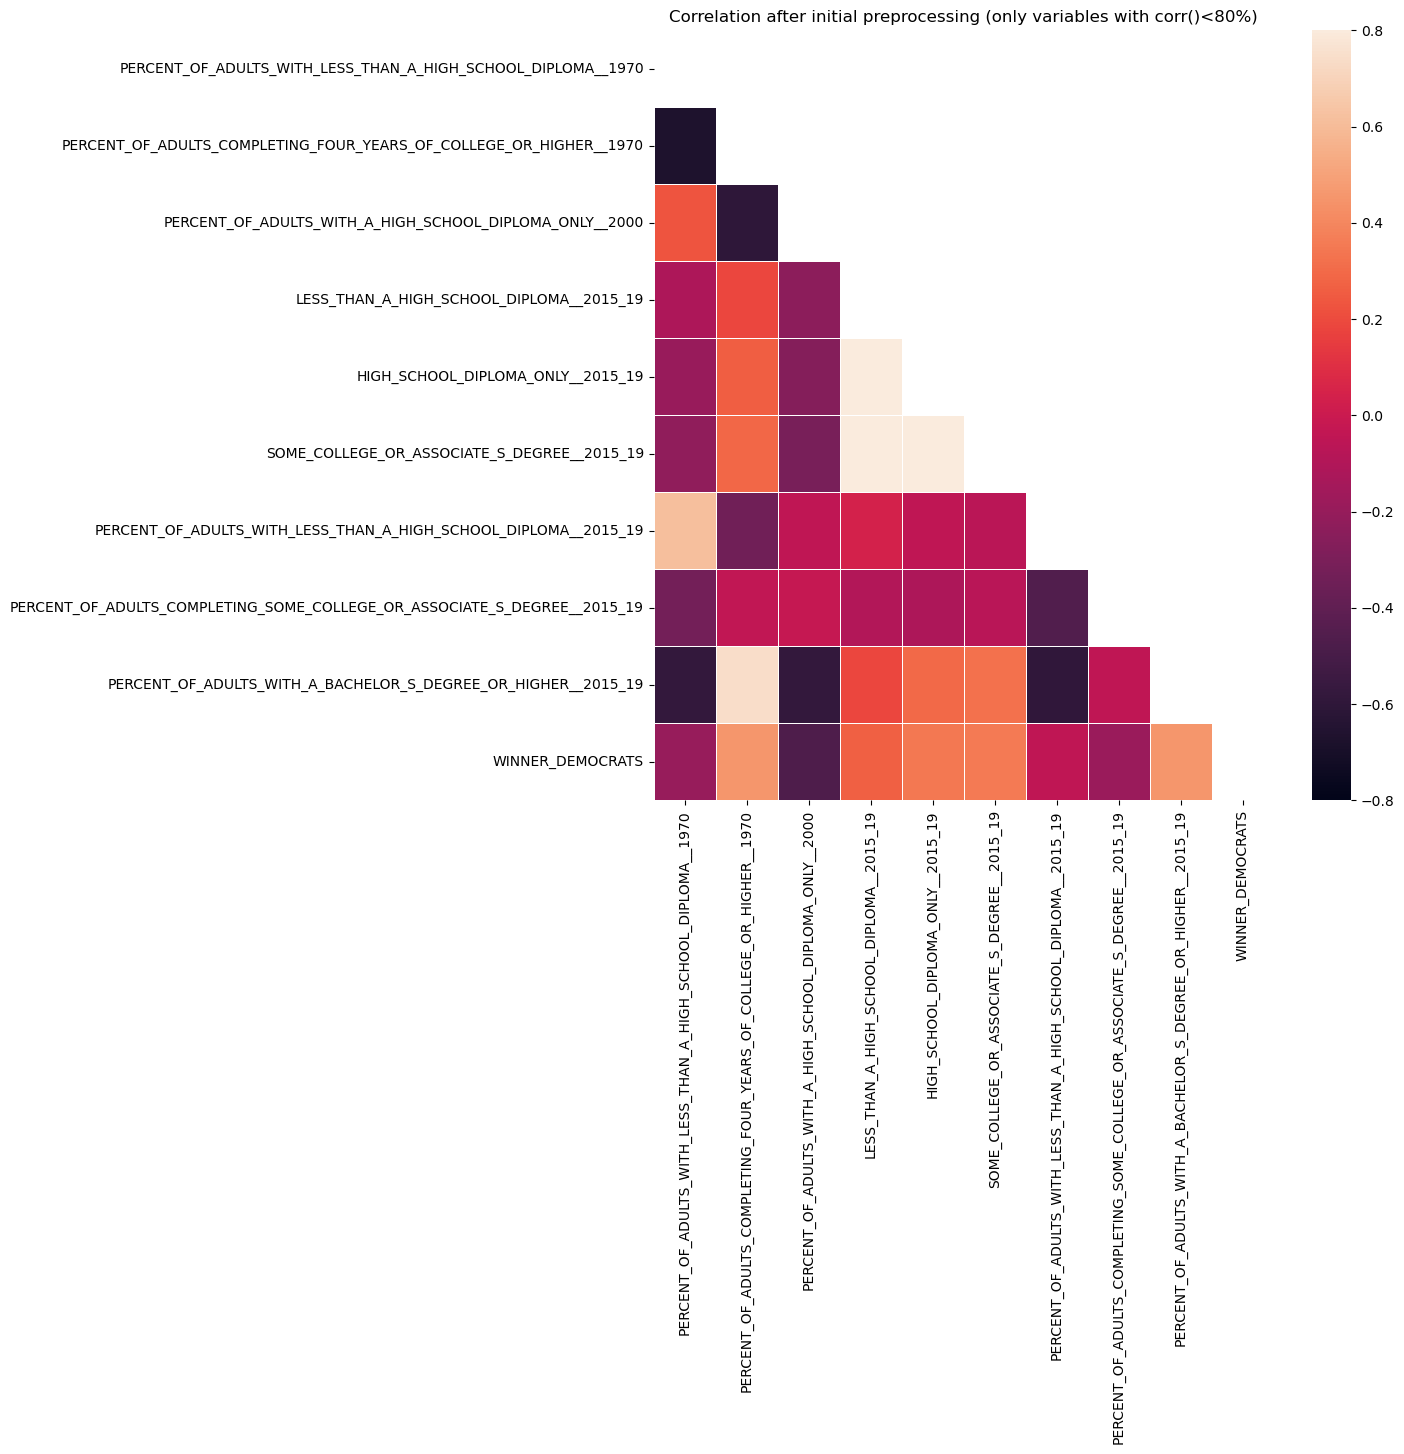

In [64]:
df_education_prepro_y = numeric_corr_analysis(df_education_prepro,
                                              y=df_presidential_2020[["COUNTY_FIPS", "WINNER_DEMOCRATS"]],
                                              alias="education",
                                               threshold=0.3,
                                              width_=1000,
                                              height_=800
                                        )

- Counties with more educated population seem to have a higher linear correlation with voting for the democrats in 2020

In [65]:
X_educ = df_education_prepro_y.drop("WINNER_DEMOCRATS", axis=1)
y_educ = df_education_prepro_y["WINNER_DEMOCRATS"]

educ_Kbest = feature_selection_kbest(X_educ, y_educ, 8)

8 most important features according to <<Kbest method>>
['PERCENT_OF_ADULTS_WITH_LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__1970', 'PERCENT_OF_ADULTS_COMPLETING_FOUR_YEARS_OF_COLLEGE_OR_HIGHER__1970', 'PERCENT_OF_ADULTS_WITH_A_HIGH_SCHOOL_DIPLOMA_ONLY__2000', 'LESS_THAN_A_HIGH_SCHOOL_DIPLOMA__2015_19', 'HIGH_SCHOOL_DIPLOMA_ONLY__2015_19', 'SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19', 'PERCENT_OF_ADULTS_COMPLETING_SOME_COLLEGE_OR_ASSOCIATE_S_DEGREE__2015_19', 'PERCENT_OF_ADULTS_WITH_A_BACHELOR_S_DEGREE_OR_HIGHER__2015_19']


C:\Users\vnarv\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



# Poverty


In [66]:
df_poverty = read_excel(f"{dir_path}PovertyEstimates.xls")
df_poverty = df_poverty.rename({'Stabr' : 'STATE'}, axis=1)
### explore data
check_nan(df_poverty)
check_duplicates(df_poverty, ['FIPStxt', 'STATE', 'Area_name'])


========== File name <_io.BufferedReader name='C://Users//vnarv//PycharmProjects//classification_SDA/data/PovertyEstimates.xls'>

Poverty estimates for the U.S., States, and counties, 2019


There are features with NAN values :
Number of features with NAN = 10
Number of values with NAN = 19064
[Feature] <--- has empty values ---> [percentage of empty values]
Rural-urban_Continuum_Code_2003  <--->  1.79%
Urban_Influence_Code_2003       <--->  1.79%
Rural-urban_Continuum_Code_2013  <--->  1.63%
Urban_Influence_Code_2013       <--->  1.63%
POV04_2019                      <--->  98.37%
CI90LB04_2019                   <--->  98.37%
CI90UB04_2019                   <--->  98.37%
PCTPOV04_2019                   <--->  98.37%
CI90LB04P_2019                  <--->  98.37%
CI90UB04P_2019                  <--->  98.37%


There none duplicates based on keys ['FIPStxt', 'STATE', 'Area_name']



In [67]:
FIPS_name = df_poverty.filter(regex="FIPS|fips").columns[0]
df_poverty = df_poverty.rename(columns={FIPS_name: "FIPS_CODE"})

df_poverty.columns = standard_name_cols(df_poverty.columns)
data_to_upper_case = ["STATE", "AREA_NAME"]
df_poverty[data_to_upper_case] = upper_consistent(df_poverty[data_to_upper_case])

In [68]:
# fix data types
object_columns = ["STATE", "AREA_NAME", "FIPS_CODE"]
numeric_columns = [col for col in df_poverty.columns if col not in object_columns]
df_poverty[numeric_columns] = df_poverty[numeric_columns].astype("Float64")
df_poverty_county = td._split_state_county(df_poverty, county_fips_list)
df_poverty_county = df_poverty_county.set_index(["STATE", "FIPS_CODE", "AREA_NAME"])
cols_to_drop = ["RURAL_URBAN_CONTINUUM_CODE_2003",
                "URBAN_INFLUENCE_CODE_2003",
                "RURAL_URBAN_CONTINUUM_CODE_2013",
                "URBAN_INFLUENCE_CODE_2013"
                    ]
df_poverty_county = df_poverty_county.drop(cols_to_drop, axis=1)


Nb of counties found: 3112 / 3152
Missing county(ies): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']



In [69]:
poverty_vars = ["PCTPOVALL_2019", "POV017_2019", "POV517_2019",
               "PCTPOV517_2019", "MEDHHINC_2019", "POV04_2019",
                "PCTPOV04_2019"]
df_poverty_prepro = prepro.run_preprocessing(
    df_x=df_poverty_county,
    abs_corr_thresh=0.80,
    type_dummies=np.number,
    feat_to_keep=poverty_vars
    )

Save mode: False

 Features with < 300 unique values
CI90LB04_2019     1
POV04_2019        1
CI90LB04P_2019    1
CI90UB04_2019     1
PCTPOV04_2019     1
CI90UB04P_2019    1
dtype: int64
The threshold of distinct values to consider as categ is 1


There are features with NAN values :
Number of features with NAN = 6
Number of values with NAN = 18672
[Feature] <--- has empty values ---> [percentage of empty values]
CI90LB04_2019                   <--->  100.00%
POV04_2019                      <--->  100.00%
CI90LB04P_2019                  <--->  100.00%
CI90UB04_2019                   <--->  100.00%
PCTPOV04_2019                   <--->  100.00%
CI90UB04P_2019                  <--->  100.00%

Dropped cols with >= 0.7 NAN values : ['CI90LB04_2019', 'POV04_2019', 'CI90LB04P_2019', 'CI90UB04_2019', 'PCTPOV04_2019', 'CI90UB04P_2019']


[Missing values before]  <--- [Feature] ---> [Missing values after]
Value imputation using ['STATE'] median/mode values 




... Selecting features by variance

In [70]:
print(f"Initial shape: {df_poverty.shape}")
print(f"Final shape: {df_poverty_prepro.shape}")

Initial shape: (3193, 34)
Final shape: (3112, 6)


Most correlated variables with Y (threshold +/- 0.1)
                WINNER_DEMOCRATS
POV017_2019             0.317507
POV517_2019             0.314647
MEDHHINC_2019           0.195687
CI90UBINC_2019          0.163963
PCTPOVALL_2019          0.100056


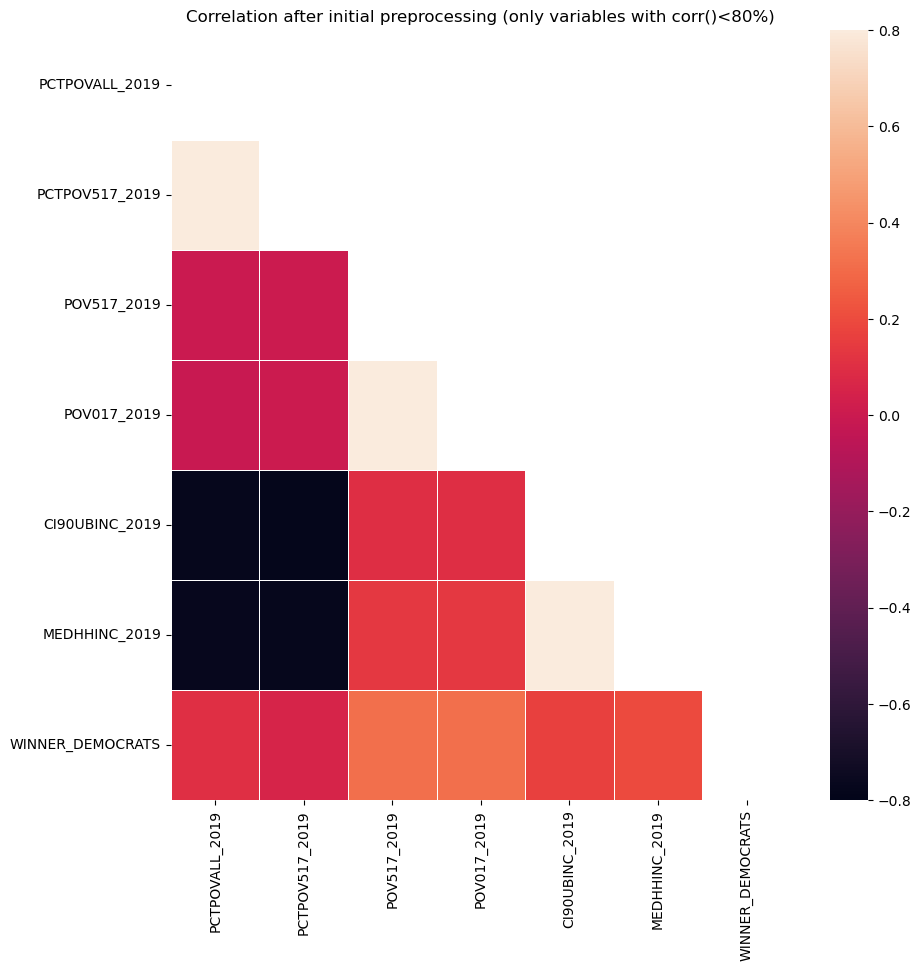

In [71]:
df_poverty_prepro_y = numeric_corr_analysis(
    df_poverty_prepro,
    y=df_presidential_2020[["COUNTY_FIPS", "WINNER_DEMOCRATS"]],
      alias="poverty",
       threshold=0.1,
      width_=800,
      height_=500
)

- `CI90LB517_2019`: 90% confidence interval lower bound of estimate of related children age 5-17 in families in poverty 2019
- `CI90LB017P_2019`: 90% confidence interval lower bound of estimate of percent of people age 0-17 in poverty 2019

A higher value for these variables is correlated with voting for the democratic party in 2020

In [72]:
X_poverty = df_poverty_prepro_y.drop("WINNER_DEMOCRATS", axis=1)
y_poverty = df_poverty_prepro_y["WINNER_DEMOCRATS"]
poverty_Kbest = feature_selection_kbest(X_poverty, y_poverty, 2)

2 most important features according to <<Kbest method>>
['POV517_2019', 'POV017_2019']


C:\Users\vnarv\anaconda3\lib\site-packages\sklearn\utils\validation.py:964: FutureWarning:

Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.



# Unemployment

In [73]:
df_unemployment = read_excel(f"{dir_path}Unemployment.xls")
df_unemployment = df_unemployment.rename({'Stabr' : 'STATE'}, axis=1)
### explore data
check_nan(df_unemployment)
check_duplicates(df_unemployment, ['fips_txt', 'STATE', 'area_name'])


========== File name <_io.BufferedReader name='C://Users//vnarv//PycharmProjects//classification_SDA/data/Unemployment.xls'>

Unemployment and median household income for the U.S., States, and counties, 2000-19


There are features with NAN values :
Number of features with NAN = 85
Number of values with NAN = 706
[Feature] <--- has empty values ---> [percentage of empty values]
Rural_urban_continuum_code_2013  <--->  1.71%
Urban_influence_code_2013       <--->  1.71%
Metro_2013                      <--->  1.62%
Civilian_labor_force_2000       <--->  0.15%
Employed_2000                   <--->  0.15%
Unemployed_2000                 <--->  0.15%
Unemployment_rate_2000          <--->  0.15%
Civilian_labor_force_2001       <--->  0.15%
Employed_2001                   <--->  0.15%
Unemployed_2001                 <--->  0.15%
Unemployment_rate_2001          <--->  0.15%
Civilian_labor_force_2002       <--->  0.15%
Employed_2002                   <--->  0.15%
Unemployed_2002                 

In [74]:
df_unemployment.head()

0 fips_txt STATE           area_name Rural_urban_continuum_code_2013  \
0    00000    US       United States                             NaN   
1    01000    AL             Alabama                             NaN   
2    01001    AL  Autauga County, AL                               2   
3    01003    AL  Baldwin County, AL                               3   
4    01005    AL  Barbour County, AL                               6   

0 Urban_influence_code_2013 Metro_2013 Civilian_labor_force_2000  \
0                       NaN        NaN                 142601667   
1                       NaN        NaN                   2133223   
2                         2          1                     21720   
3                         2          1                     69533   
4                         6          0                     11373   

0 Employed_2000 Unemployed_2000 Unemployment_rate_2000  ...  \
0     136904680         5696987               3.995035  ...   
1       2035594           97629                    4.6  ...   
2         20846             874                      4  ...   
3         66971            2562                    3.7  ...   
4         10748             625                    5.5  ...   

0 Civilian_labor_force_2018 Employed_2018 Unemployed_2018  \
0                 161389026     155102319         6286707   
1                   2216627       2130845           85782   
2                     26196         25261             935   
3                     95233         91809            3424   
4                      8414          7987             427   

0 Unemployment_rate_2018 Civilian_labor_force_2019 Employed_2019  \
0               3.895375                 163100055     157115247   
1                    3.9                   2241747       2174483   
2                    3.6                     26172         25458   
3                    3.6                     97328         94675   
4                    5.1                      8537          8213   

0 Unemployed_2019 Unemployment_rate_2019 Median_Household_Income_2019  \
0         5984808               3.669409                        65712   
1           67264                      3                        51771   
2             714                    2.7                        58233   
3            2653                    2.7                        59871   
4             324                    3.8                        35972   

0 Med_HH_Income_Percent_of_State_Total_2019  
0                                       NaN  
1                                       100  
2                                112.481888  
3                                115.645828  
4                                 69.482918  

[5 rows x 88 columns]

In [75]:
FIPS_name = df_unemployment.filter(regex="FIPS|fips").columns[0]
df_unemployment = df_unemployment.rename(columns={FIPS_name: "FIPS_CODE"})

df_unemployment.columns = standard_name_cols(df_unemployment.columns)
data_to_upper_case = ["STATE", "AREA_NAME"]
df_unemployment[data_to_upper_case] = upper_consistent(df_unemployment[data_to_upper_case])

In [76]:
# fix data types
object_columns = ["STATE", "AREA_NAME", "FIPS_CODE"]
df_unemployment_county = td._split_state_county(df_unemployment, county_fips_list)
df_unemployment_county = df_unemployment_county.set_index(["STATE", "FIPS_CODE", "AREA_NAME"])
cols_to_drop = ["RURAL_URBAN_CONTINUUM_CODE_2013",
                "URBAN_INFLUENCE_CODE_2013"]
df_unemployment_county = df_unemployment_county.drop(cols_to_drop, axis=1)


Nb of counties found: 3112 / 3152
Missing county(ies): ['02901', '02902', '02903', '02904', '02905', '02906', '02907', '02908', '02909', '02910', '02911', '02912', '02913', '02914', '02915', '02916', '02917', '02918', '02919', '02920', '02921', '02922', '02923', '02924', '02925', '02926', '02927', '02928', '02929', '02930', '02931', '02932', '02933', '02934', '02935', '02936', '02937', '02938', '02939', '02940']



In [77]:
df_unemployment_prepro = prepro.run_preprocessing(
    df_x=df_unemployment_county.copy(deep=True),
    abs_corr_thresh=0.80,
    type_dummies=np.number,
    feat_to_keep=["UNEMPLOYMENT_RATE_2019"]
    )

Save mode: False

 Features with < 300 unique values
METRO_2013                  2
UNEMPLOYMENT_RATE_2018     93
UNEMPLOYMENT_RATE_2019     94
UNEMPLOYMENT_RATE_2000    102
UNEMPLOYMENT_RATE_2017    103
UNEMPLOYMENT_RATE_2007    108
UNEMPLOYMENT_RATE_2006    109
UNEMPLOYMENT_RATE_2004    110
UNEMPLOYMENT_RATE_2005    111
UNEMPLOYMENT_RATE_2001    113
UNEMPLOYMENT_RATE_2016    114
UNEMPLOYMENT_RATE_2003    118
UNEMPLOYMENT_RATE_2015    119
UNEMPLOYMENT_RATE_2002    120
UNEMPLOYMENT_RATE_2008    122
UNEMPLOYMENT_RATE_2014    136
UNEMPLOYMENT_RATE_2013    156
UNEMPLOYMENT_RATE_2012    159
UNEMPLOYMENT_RATE_2011    173
UNEMPLOYMENT_RATE_2009    176
UNEMPLOYMENT_RATE_2010    177
dtype: int64
The threshold of distinct values to consider as categ is 10


There are features with NAN values :
Number of features with NAN = 8
Number of values with NAN = 56
[Feature] <--- has empty values ---> [percentage of empty values]
UNEMPLOYMENT_RATE_2006          <--->  0.22%
UNEMPLOYMENT_RATE_2005         

In [78]:
print(f"Initial shape: {df_unemployment_county.shape}")
print(f"Final shape: {df_unemployment_prepro.shape}")

Initial shape: (3112, 83)
Final shape: (3112, 12)


Most of the unmeployment variables are highly correlated

Most correlated variables with Y (threshold +/- 0.3)
               WINNER_DEMOCRATS
EMPLOYED_2004          0.361207


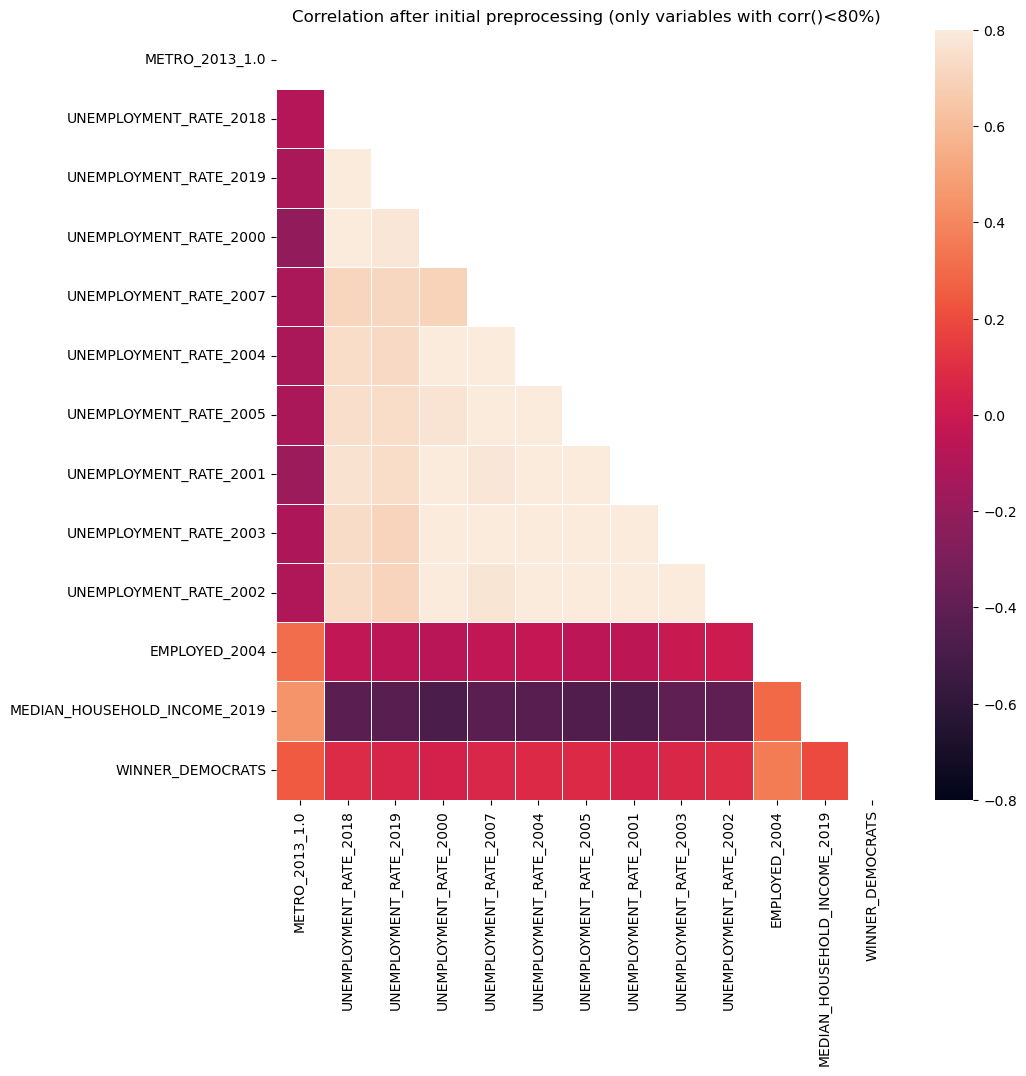

In [79]:
df_unemployment_prepro_y = numeric_corr_analysis(
    df_unemployment_prepro,
    y=df_presidential_2020[["COUNTY_FIPS", "WINNER_DEMOCRATS"]],
    alias="unemployment",
    threshold=0.3,
    width_=1000,
    height_=800
    )

**Metro_2013**: Corresponds to metro/ non metro dummy
**MED_HH_INCOME_PERCENT_OF_STATE_TOTAL_2019**: County HH median income as a percent of the State total median HH income

In [ ]:
X_unmplymnt = df_unemployment_prepro_y.drop("WINNER_DEMOCRATS", axis=1)
y_unmplymnt = df_unemployment_prepro_y["WINNER_DEMOCRATS"]

unmplymnt_Kbest = feature_selection_kbest(X_unmplymnt, y_unmplymnt, 5)